In [1]:
!pip install seaborn

In [2]:
!pip install matplotlib

In [31]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
#匯入資料（使用駝背資料集來練習，和之前學R決策樹的練習相同）
df = pd.read_csv('./test.csv').drop([i for i in range(91)]).reset_index(drop=True)
df.head()

,Unnamed: 0,MA_1,MACD_5,MACD_10,MACD_20,MACD_60,MACD_9,RSV_9,K_values,D_values,Mean_Volume_15
0,2016-05-26,131.10,-6.377841,-4.903298,-2.121741,3.210515,-5.417619,1.000000,0.948601,0.827192,3.574047e+07
1,2016-05-27,131.52,-5.923668,-5.422292,-2.421408,3.040407,-5.925396,1.125737,1.007646,0.887344,3.433560e+07
2,2016-05-30,132.80,-5.349264,-5.854985,-2.752349,2.870002,-6.140426,1.043033,1.019442,0.931376,3.343440e+07
3,2016-05-31,133.22,-4.813969,-6.017172,-3.120711,2.682917,-6.027812,0.884859,0.974581,0.945778,3.329180e+07
4,2016-06-01,132.80,-4.322285,-5.859748,-3.437565,2.506478,-5.677745,1.080113,1.009758,0.967105,3.594987e+07


In [33]:
CSV = './{}.TW.csv'.format(2330)

daily_trade =pd.read_csv('{}'.format(CSV)).drop(['Dividends','Stock Splits'],axis = 1).drop([i for i in range(92)]).reset_index(drop=True)
daily_trade.head()

,Date,Open,High,Low,Close,Volume
0,2016-05-26,131.10,131.52,130.25,131.52,17196000
1,2016-05-27,132.37,132.80,131.10,132.80,22992000
2,2016-05-30,133.22,134.07,131.52,133.22,36339000
3,2016-05-31,132.80,133.64,131.52,132.80,69656000
4,2016-06-01,132.37,134.92,132.37,134.92,26926000


In [34]:
res = pd.concat([df,daily_trade],axis=1).drop([0]).drop(['Unnamed: 0','MA_1'],axis = 1).set_index(['Date'])

In [35]:
res['Index'] = ''
for i in range(1,len(res)):
    if res['Close'][i-1] < daily_trade['Close'][i]:
        res['Index'][i] = 'NOT'
    else:
        res['Index'][i] = 'UP'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
res 

,MACD_5,MACD_10,MACD_20,MACD_60,MACD_9,RSV_9,K_values,D_values,Mean_Volume_15,Open,High,Low,Close,Volume,Index
Date,,,,,,,,,,,,,,,
2016-05-30,-5.349264,-5.854985,-2.752349,2.870002,-6.140426,1.043033,1.019442,0.931376,3.343440e+07,133.22,134.07,131.52,133.22,36339000,UP
2016-05-31,-4.813969,-6.017172,-3.120711,2.682917,-6.027812,0.884859,0.974581,0.945778,3.329180e+07,132.80,133.64,131.52,132.80,69656000,UP
2016-06-01,-4.322285,-5.859748,-3.437565,2.506478,-5.677745,1.080113,1.009758,0.967105,3.594987e+07,132.37,134.92,132.37,134.92,26926000,UP
2016-06-02,-3.732946,-5.466293,-3.680862,2.317874,-5.152933,1.000000,1.006506,0.980238,3.507447e+07,134.92,135.77,134.07,134.92,21977000,UP
2016-06-03,-3.005541,-4.900104,-3.854156,2.131909,-4.513490,1.047138,1.020050,0.993509,3.495633e+07,134.92,136.19,134.92,136.19,31853000,UP
2016-06-06,-2.142499,-4.228826,-3.966810,1.946631,-3.840448,1.052109,1.030736,1.005918,3.307733e+07,136.61,137.46,135.77,136.61,28757000,UP
2016-06-07,-0.959998,-3.517294,-4.020448,1.792575,-3.132395,1.000000,1.020491,1.010776,3.291893e+07,137.04,138.74,136.61,137.46,47046000,UP
2016-06-08,0.422224,-2.767743,-4.073714,1.670943,-2.317147,1.199058,1.080013,1.033855,3.403687e+07,139.16,140.86,138.74,140.43,45214000,UP
2016-06-13,1.835961,-1.922405,-4.088883,1.572331,-1.390439,0.651639,0.937222,1.001644,3.498067e+07,136.61,137.89,136.61,137.46,48750000,UP


In [44]:
res = res.drop(['2016-05-27']).drop(['Volume','MACD_5','MACD_10','MACD_20','MACD_60'],axis = 1).reset_index(drop=True)

In [48]:
res = res.drop(['MACD_9'],axis = 1)
res

,RSV_9,K_values,D_values,Mean_Volume_15,Open,High,Low,Close,Index
0,1.043033,1.019442,0.931376,3.343440e+07,133.22,134.07,131.52,133.22,UP
1,0.884859,0.974581,0.945778,3.329180e+07,132.80,133.64,131.52,132.80,UP
2,1.080113,1.009758,0.967105,3.594987e+07,132.37,134.92,132.37,134.92,UP
3,1.000000,1.006506,0.980238,3.507447e+07,134.92,135.77,134.07,134.92,UP
4,1.047138,1.020050,0.993509,3.495633e+07,134.92,136.19,134.92,136.19,UP
5,1.052109,1.030736,1.005918,3.307733e+07,136.61,137.46,135.77,136.61,UP
6,1.000000,1.020491,1.010776,3.291893e+07,137.04,138.74,136.61,137.46,UP
7,1.199058,1.080013,1.033855,3.403687e+07,139.16,140.86,138.74,140.43,UP
8,0.651639,0.937222,1.001644,3.498067e+07,136.61,137.89,136.61,137.46,UP
9,0.635974,0.836806,0.946698,3.588853e+07,136.61,138.31,136.61,137.46,UP


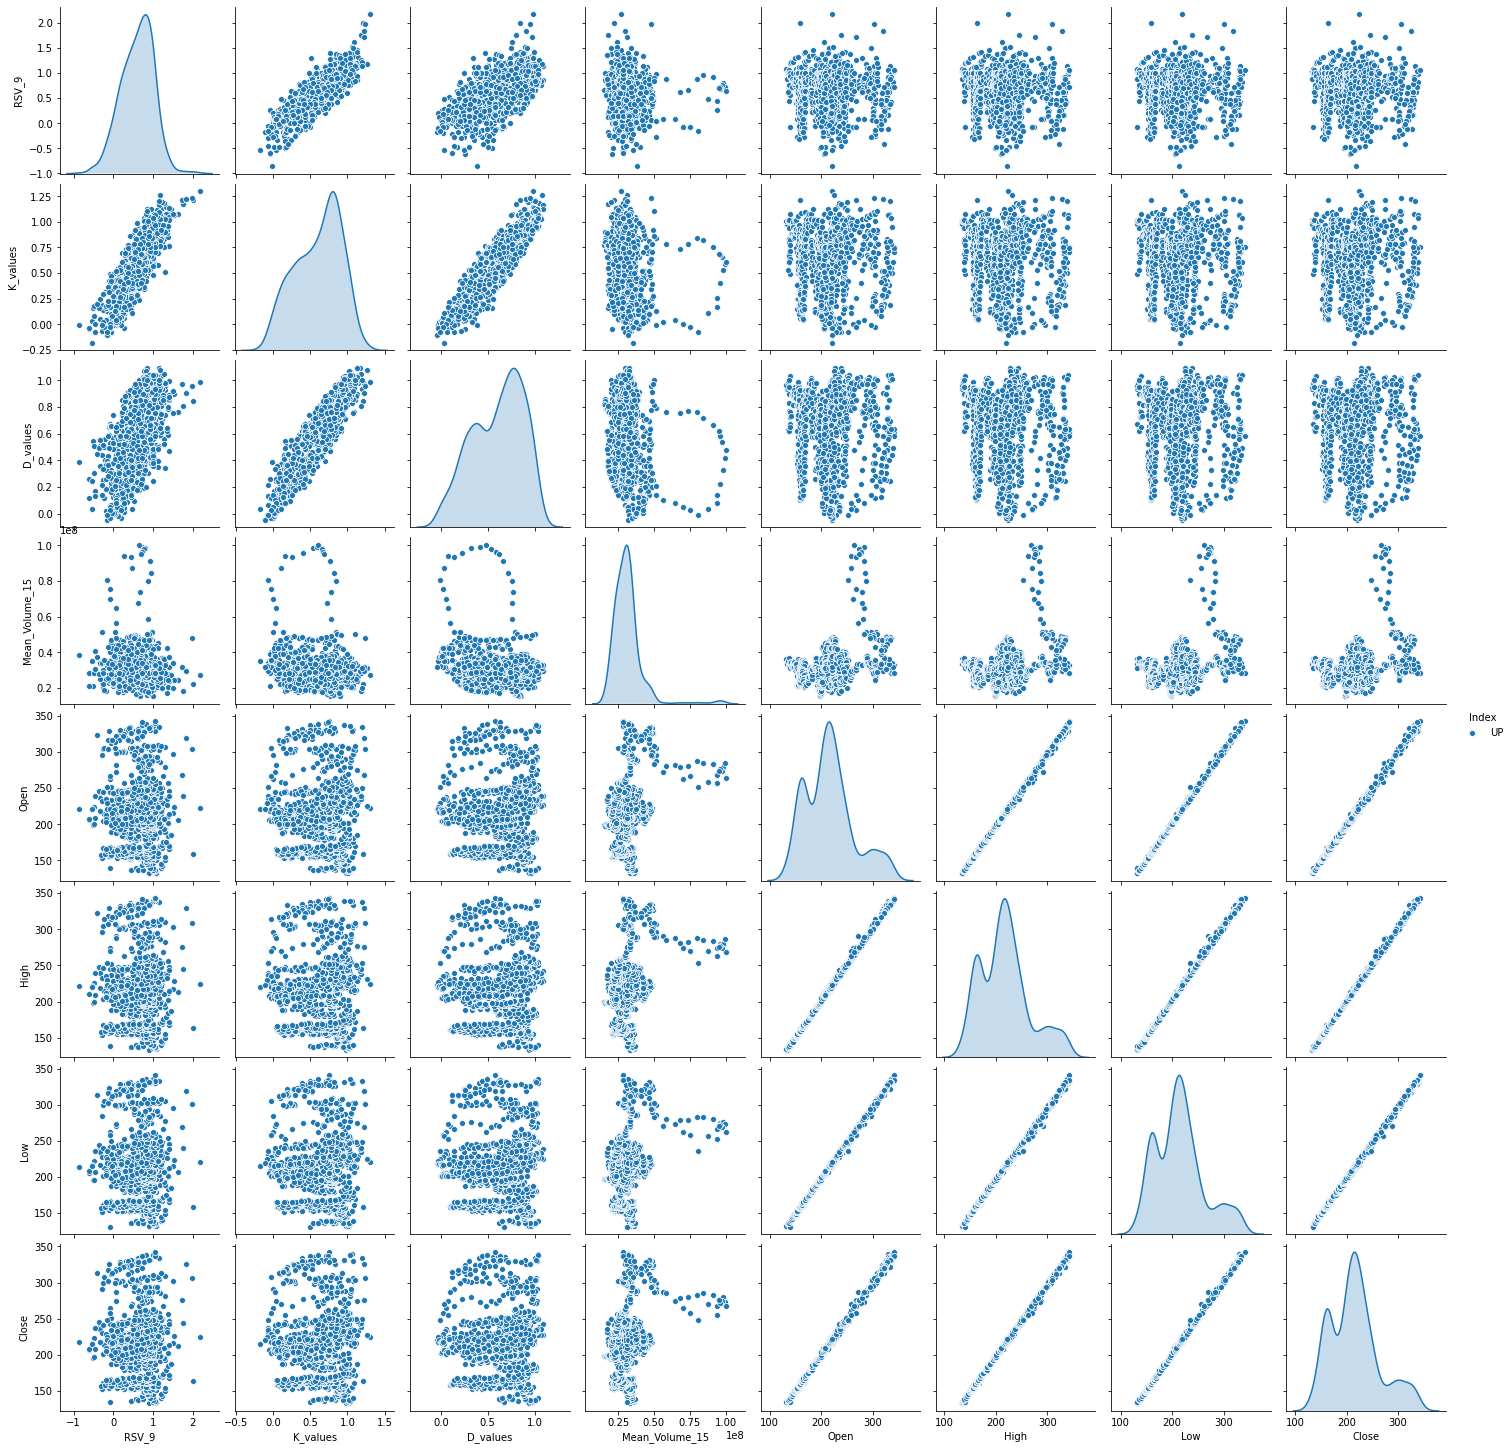

In [49]:
#以seaborn pairplot快速掃瞄數字型資料有沒有趨勢
sns.pairplot(res,hue='Index')

In [50]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
X = res.drop('Index',axis=1)
y = res['Index']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [55]:
X_test

,RSV_9,K_values,D_values,Mean_Volume_15,Open,High,Low,Close
900,0.779887,0.609252,0.479469,4.666741e+07,327.32,329.30,326.83,328.31
392,1.000000,0.585494,0.463225,2.116419e+07,207.30,209.58,206.39,209.12
127,0.460733,0.448241,0.427260,3.043600e+07,160.05,161.37,160.05,161.37
98,0.916824,0.715731,0.680499,2.760447e+07,167.10,167.99,166.66,167.99
648,0.758394,0.639188,0.517082,3.016708e+07,206.36,207.77,205.41,205.41
889,0.452404,0.645041,0.637807,3.059873e+07,326.83,333.26,326.83,331.28
475,1.083257,0.846149,0.619798,4.345147e+07,211.40,213.22,210.03,212.31
32,0.818557,0.858443,0.902622,3.463740e+07,148.14,149.47,146.82,149.47
769,1.000000,1.024840,0.985439,2.702502e+07,259.08,260.06,256.16,257.62
572,1.094758,0.857919,0.664885,3.603160e+07,249.33,251.22,247.44,250.27


In [53]:
#評估決策樹模型好壞
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

,MACD_9,RSV_9,K_values,D_values,Mean_Volume_15,Open,High,Low,Close,Index
0,-6.140426,1.043033,1.019442,0.931376,3.343440e+07,133.22,134.07,131.52,133.22,1
1,-6.027812,0.884859,0.974581,0.945778,3.329180e+07,132.80,133.64,131.52,132.80,1
2,-5.677745,1.080113,1.009758,0.967105,3.594987e+07,132.37,134.92,132.37,134.92,1
3,-5.152933,1.000000,1.006506,0.980238,3.507447e+07,134.92,135.77,134.07,134.92,1
4,-4.513490,1.047138,1.020050,0.993509,3.495633e+07,134.92,136.19,134.92,136.19,1
5,-3.840448,1.052109,1.030736,1.005918,3.307733e+07,136.61,137.46,135.77,136.61,1
6,-3.132395,1.000000,1.020491,1.010776,3.291893e+07,137.04,138.74,136.61,137.46,1
7,-2.317147,1.199058,1.080013,1.033855,3.403687e+07,139.16,140.86,138.74,140.43,1
8,-1.390439,0.651639,0.937222,1.001644,3.498067e+07,136.61,137.89,136.61,137.46,1
9,-0.389045,0.635974,0.836806,0.946698,3.588853e+07,136.61,138.31,136.61,137.46,1
